## Steps :
  1.  Read Dataset
  2. Divide the feature base on independent and dependent features
  3. Split the Dataset into two part one is train dataset and sencond is test dataset
  4. Standard The Dataset
  5. Train the ML Model
  6. Test Model

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# Load Data
data = pd.read_csv("height-weight.csv")

In [74]:
data.head(2)

,Weight,Height
0,45,120
1,58,135


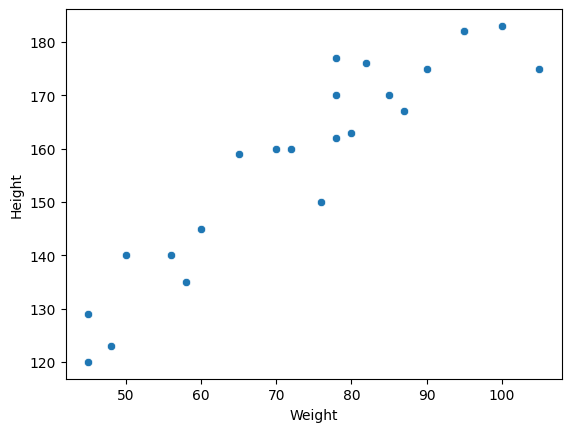

In [75]:
sns.scatterplot(x=data["Weight"],y=data["Height"])
plt.show()

In [76]:
# divide datase into independet and dependent features
# Independent Features
X = data[["Weight"]]

# Dependent Features
y = data["Height"]

In [77]:
# Split the train and testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [78]:
print(f"Shape Of X_train : {X_train.shape} \nShape Of X_test : {X_test.shape} \nShape Of y_train : {y_train.shape} \nShape Of y_test : {y_test.shape}")

Shape Of X_train : (18, 1) 
Shape Of X_test : (5, 1) 
Shape Of y_train : (18,) 
Shape Of y_test : (5,)


In [79]:
# Standardize the dataset Trai independent data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Note : -->

# fit_transform = fit() + transform (Refer z-Score method in feacture scaling technique)

# X_train used fit_transform() function but X_test used only transform() which can use mean and standard devaition from X_train dataset here new term is use that name is Data Linkage

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

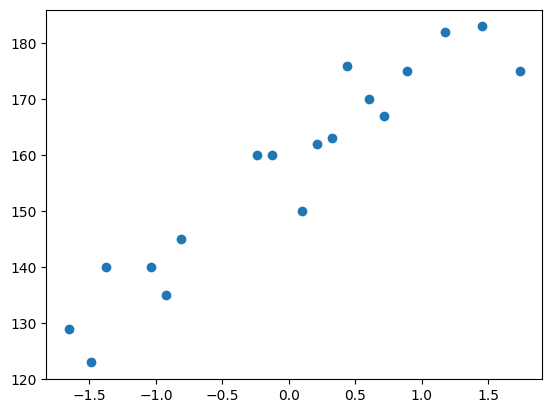

In [80]:
plt.scatter(X_train,y_train)
plt.show()

In [81]:
# Train the simple Linear Regression Model
from sklearn.linear_model import LinearRegression

# create Regression object
regressor = LinearRegression()
regressor

LinearRegression()

In [82]:
# Train Model
regressor.fit(X_train,y_train)

LinearRegression()

In [83]:
print(f"The Slope Of Linear Regression Model or Coefficient Of Weight is : {regressor.coef_}")

print(f"Intercept : {regressor.intercept_}")

The Slope Of Linear Regression Model or Coefficient Of Weight is : [17.03440872]
Intercept : 157.5


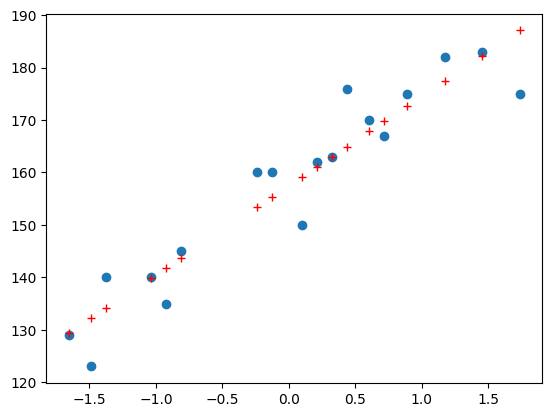

In [84]:
# plot the traing data points
plt.scatter(X_train,y_train)

# Create Best Fit Line : predict() -> return Predicted Values
plt.plot(X_train,regressor.predict(X_train),"r+")

#### Prediction of Train Data :
1. Predicted Height Output = intercept + coef_weights
2. y_pred_train = 157.5 + 17.03(X_train)

#### Predicateion Of Test Data :
1. redicate Height Output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [85]:
y_pred_test = regressor.predict(X_test)
print(y_pred_test)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [86]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

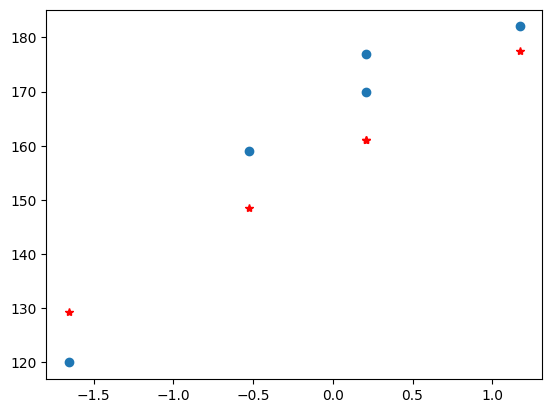

In [87]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),"r*")

### Performance Metrics
### We Calculate MSE, MAE, RMSR
### R Square and Adjusted R Square

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [89]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [90]:

print(f"""
          Mean Squared Error : {mse}
          Mean Absolute Error : {mae}
          RMSR : {rmse}
      """)


          Mean Squared Error : 109.77592599051664
          Mean Absolute Error : 9.822657814519232 
          RMSR : 10.477400726827081
      


R Square :  

Formual :<br>
    1.  R^2 Squred
    2. where R^2 = Coefficient Of determination SSR = Sum of squares of residuals SST = Total Sum Of Squres

In [91]:
# Model Score :: (score*100)%
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(f"Model Score : {score} :-> {round(score*100,2)}%")

Model Score : 0.776986986042344 :-> 77.7%


### Adusted R Square

****
Adxusted R2 = 1 - [(1-R2) * (n-1)] / [(n-k-1)]

Where :
1.  R2 : The R2 of the model
2. n : The Number Of Observations
3. k : The Number Of predictor variables

In [92]:
# New Data Point Weight in 80
scaled_weight =scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [93]:
print(f" The weight is {scaled_weight[0]} then hight is {regressor.predict([scaled_weight[0]])}")


 The weight is [0.32350772] then hight is [163.01076266]


In [94]:
# Residuals :
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<Axes: xlabel='Height', ylabel='Count'>

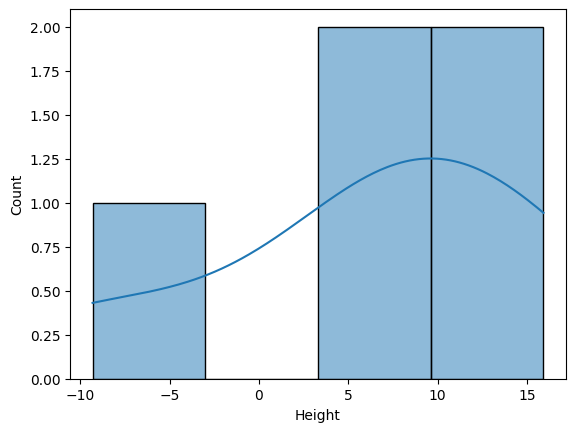

In [95]:
sns.histplot(data=residuals,kde=True)

<ipython-input-96-db293bac0641>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

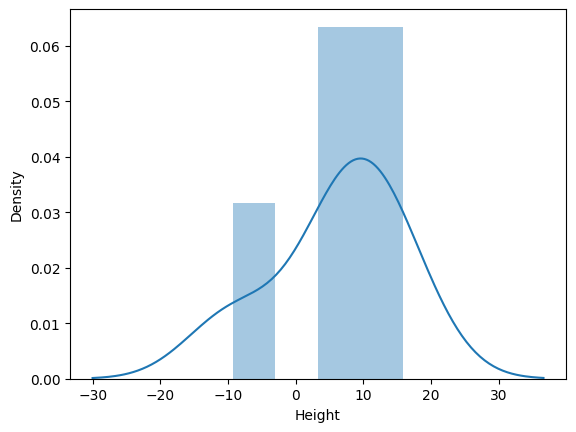

In [96]:
sns.distplot(residuals,kde=True)

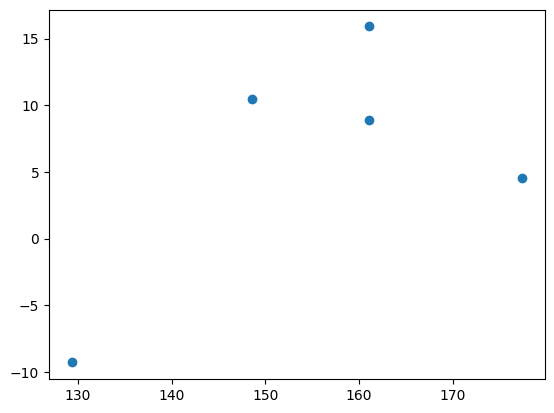

In [97]:
plt.scatter(y_pred_test,residuals)